# Introduction to Inferential Statistics

## Introduction to Probability

- Statistics_ProbabilityDistribution_Python.ipynb


## Introduction to Inference

* Sample Mean & Population Mean
* Statistical Inference
* Central Limit Theorem
* Confidence Intervals
* Interpretation Of Confidence Interval
* Hypothesis Testing
* Why Null Hypothesis ?
* Alternate Hypothesis
* P-Value
* t-test
* Type I and Type II error
* Chi-squared Goodness of fit test
* Chi-sqaured Test of Independence

## Introduction to Inference

### Inference Statistics

The area of statistics known as inferential statistics is known to make conclusions and forecasts about a population from a sample. Using sample data to draw conclusions or make generalisations about a larger population. In other words, inferential statistics is concerned with making inferences about the unknown population parameters from the known sample statistics.

### Statistical Inference
Statistical Inference is a process of drawing conclusions about a population based on a sample of data. It involves using various statistical methods to analyze the sample data and make inferences or predictions about the larger population. The goal of statistical inference is to make accurate and reliable estimates or predictions based on limited data. It is widely used in various fields, including finance, medicine, social sciences, and engineering.

1. Population vs Sample
2. Sampling Techniques
    - Simple random sampling
    - Stratified sampling
    - Cluster sampling
    - Systematic sampling
3. Confidence Intervals
4. Hypothesis testing: Null and Alternative
    - Chi-squared test
    - ANOVA (Analysis of Variance)
    - T-Test
        - One-sample t-test
        - Two-sample t-test
5. Regression analysis


## Statistical Inference



* This **subset** of the population is nothing but the Sample data

* We carry out various tests on the Sample to gain insight on the larger population out there!

* Therefore Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between different data samples.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population.

## A. Population vs Sample

In statistics, a population refers to the entire group of individuals, objects, or events that we are interested in studying. A sample, on the other hand, is a smaller subset of the population that is selected to represent the population. The goal of statistical inference is to use information obtained from a sample to make inferences or draw conclusions about the larger population. By studying the sample, we hope to gain insights into the population without having to measure every single member of the population.

### Sample Mean and population Mean

* Let's consider a sample of 500 houses at random from 1460 houses and plot it's mean
* But the mean of these 500 houses can be near or pretty far away from the mean of the 1460 houses calculated earlier.

In [ ]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a= data['SalePrice'], size=500)

# getting the sample mean
print ("Sample mean:", sample_ages.mean() )

# getting the population mean
print("Population mean:", data['SalePrice'].mean())

Sample mean: 177499.802
Population mean: 180921.19589041095


### Central Limit Theorem

The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.

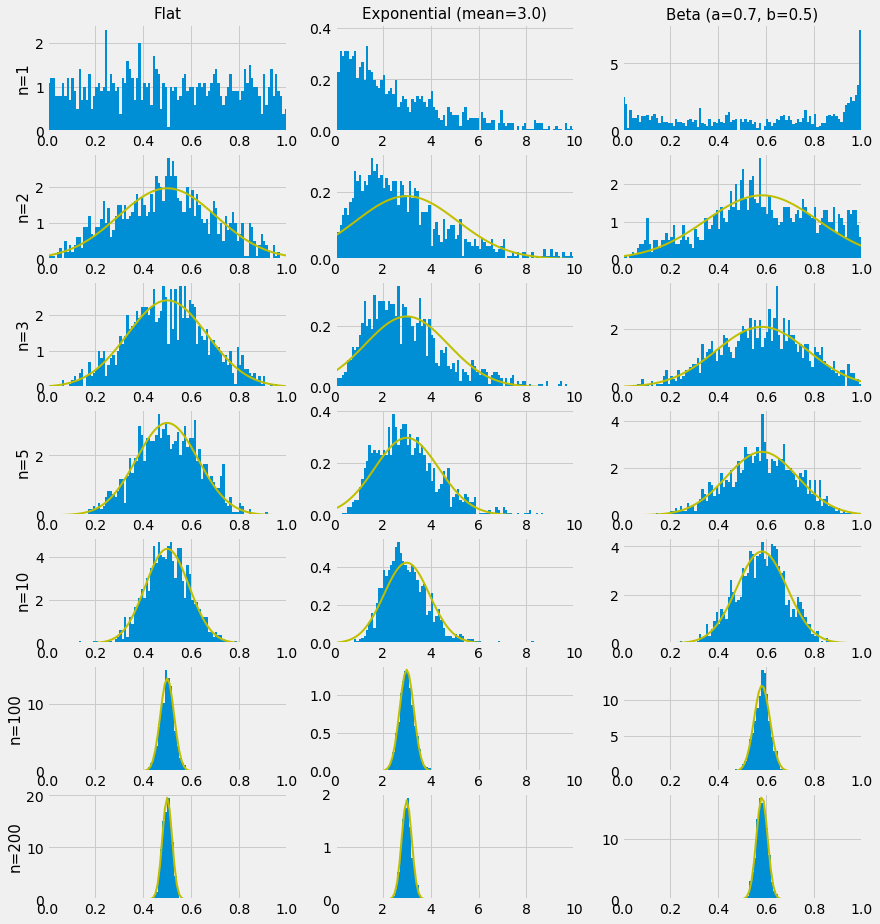

In [ ]:
# lets check Central Limit theorem for this data

# provides capability to define function with partial arguments
from functools import partial

# number of samples to average over.
n=np.array([1, 2, 3, 5, 10, 100, 200])

# number of times samples of size n are taken. Try varying this number.
N = 1000

# number of bin boundaries on plots
nobb=101

# mean of exponential distribution
exp_mean=3

# parameters of beta distribution
a,b=0.7,0.5

dist=[partial(np.random.random),
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

# lets define the title names.
title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean,
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

# ranges of the three distributions
drange=np.array([[0,1],[0,10],[0,1]])

# means of the three distributions
means=np.array([0.5,exp_mean,a/(a+b)])

# variances of the three distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)])

# generates random samples in the specified ranges for the respective distributions.
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

 # loop over number of n samples to average over
for i in range(ln):
     # loop over the different distributions
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)
plt.show()


In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also,

the mean of the Gaussian distribution is the same as the original parent distribution,
the width of the Gaussian distribution varies with sample size as $1/\sqrt{n}$.

## B. Sampling Techniques

Sampling is a process of selecting a subset of individuals or observations from a population to estimate or infer something about the whole population. There are several types of sampling techniques used in statistics, including:



### 1. Simple random sampling:

In this technique, each individual or observation has an equal chance of being selected for the sample. For example, if we want to survey 100 people from a population of 1000, we can randomly select 100 individuals from the population.

Formula: Probability of selection of each element = (Population size)/(Sample size)

In [ ]:
import random

population = [1,2,3,4,5,6,7,8,9,10]
sample_size = 5

sample = random.sample(population, sample_size)
print(sample)

[8, 4, 3, 1, 9]


### 2. Stratified sampling:

In this technique, the population is divided into non-overlapping subgroups or strata, and a random sample is taken from each stratum. This ensures that the sample is representative of the population.

Formula: Sample size of each stratum = (Size of stratum/Total population size) x Sample size

In [ ]:
import pandas as pd

population = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
                           'Age': [20, 25, 30, 35, 40, 45, 50, 55],
                           'Income': [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]})

strata = population.groupby('Gender').apply(lambda x: x.sample(n=2, replace=True)).reset_index(drop=True)
print(strata)

   Gender  Age  Income
0  Female   55    9000
1  Female   35    5000
2    Male   40    6000
3    Male   30    4000


### 3. Cluster sampling:

In this technique, the population is divided into clusters, and a random sample of clusters is selected. Then, all individuals within the selected clusters are included in the sample.

Formula: Sample size of each cluster = (Cluster size/Total population size) x Sample size

In [ ]:
import pandas as pd

population = pd.DataFrame({'City': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
                           'Age': [20, 25, 30, 35, 40, 45, 50, 55],
                           'Income': [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]})

clusters = population.groupby('City').apply(lambda x: x.sample(n=2, replace=True)).reset_index(drop=True)
print(clusters)

  City  Age  Income
0    A   25    3000
1    A   20    2000
2    B   30    4000
3    B   35    5000
4    C   45    7000
5    C   45    7000
6    D   50    8000
7    D   50    8000


### 4. Systematic sampling:

In this technique, the population is first ordered, and then a random starting point is selected. Then, every kth individual is selected for the sample.

Formula: Sampling interval = Population size/Sample size

In [ ]:
import pandas as pd

population = pd.DataFrame({'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                           'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
                           'Income': [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000]})

sample_size = 5

## C. Confidence Interval

**Confidence Interval (CI)** is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range.


Confidence interval is a statistical measure used to estimate the range of values within which the true population parameter is expected to lie with a certain degree of confidence. It is a range of values constructed from a sample of data that can be used to infer the range of values in the population.

The formula for confidence interval is given as:

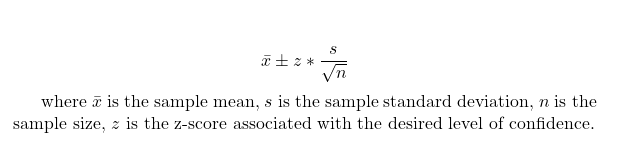

In [ ]:
import numpy as np
from scipy.stats import norm

# generate a sample of data
data = np.random.normal(10, 2, 100)

# calculate sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# set the desired level of confidence
confidence_level = 0.95

# calculate the z-score associated with the desired level of confidence
z_score = norm.ppf(1 - ((1 - confidence_level) / 2))

# calculate the lower and upper bounds of the confidence interval
lower_bound = sample_mean - (z_score * (sample_std / np.sqrt(len(data))))
upper_bound = sample_mean + (z_score * (sample_std / np.sqrt(len(data))))

# print the results
print("Sample mean:", sample_mean)
print("Confidence interval:", lower_bound, "-", upper_bound)

Sample mean: 9.949667683045913
Confidence interval: 9.552080609172782 - 10.347254756919044


Suppose we want to estimate the average height of all male students in a university. We take a random sample of 100 male students and calculate the sample mean height to be 175 cm and the sample standard deviation to be 5 cm. We want to construct a 95% confidence interval for the true population mean height.

Using the formula above, we can calculate the confidence interval as:

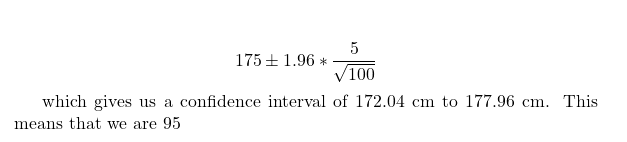

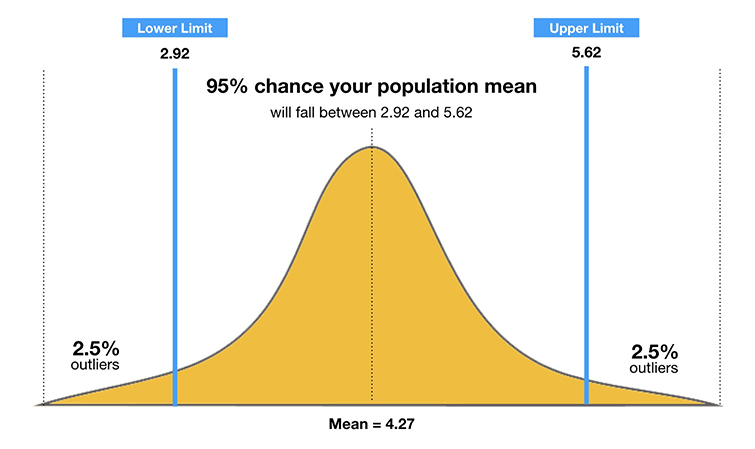

In [ ]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)

 # Check the z-critical value
print("z-critical value: ",z_critical)

# Get the population standard deviation
pop_stdev = data['SalePrice'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.
* Now, let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean

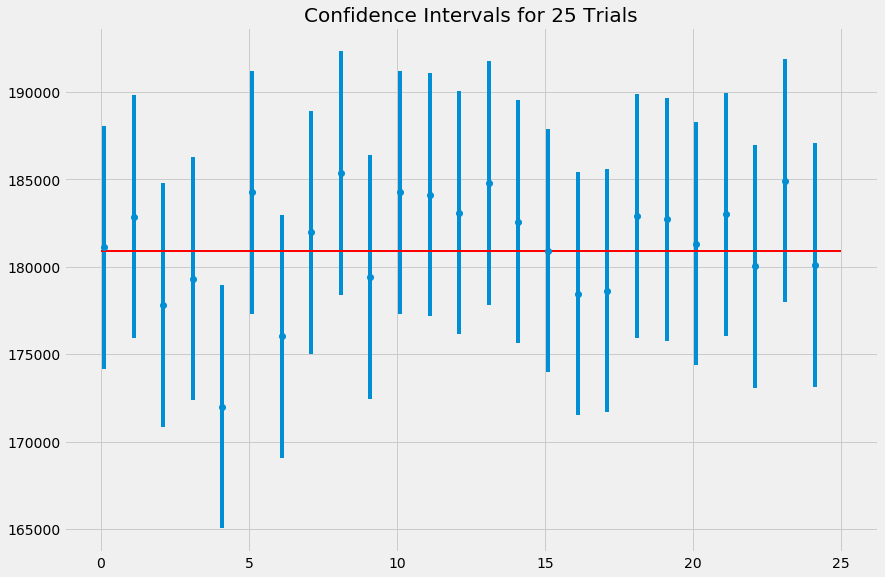

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value*
    z_critical = stats.norm.ppf(q = 0.975)

    # Get the population standard deviation
    pop_stdev = data['SalePrice'].std()

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)

    intervals.append(confidence_interval)


plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means,
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(),
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()

* It is easily visible that 95% of the times the blue lines(the sample meean) overlaps with the red line(the true mean), also 5% of the times it is expected to not overlap with the red line(the true mean).

## D. Hypothesis Testing

Hypothesis testing is a statistical method that is used to determine if there is enough evidence to reject a null hypothesis in favor of an alternative hypothesis. The null hypothesis is a statement that there is no difference between two populations, while the alternative hypothesis is a statement that there is a difference.

* $Statistical Hypothesis$, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference.

### Null Hypothesis

* In Inferential Statistics, **The Null Hypothesis is a general statement or default position that there is no relationship between two measured phenomena or no association among groups.**

* Statistical hypothesis tests are based on a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing.

* Therefore, in our case the Null Hypothesis would be:
**The Mean of House Prices in OldTown is not different from the houses of other neighborhoods**

### Alternate Hypothesis

* The alternate hypothesis is just an alternative to the null. For example, if your null is **I'm going to win up to 1000** then your alternate is **I'm going to win more than 1000.** Basically, you're looking at whether there's enough change (with the alternate hypothesis) to be able to reject the null hypothesis

###  The Null Hypothesis is assumed to be true and Statistical evidence is required to reject it in favor of an Alternative Hypothesis.

The process of hypothesis testing involves the following steps:

- State the null and alternative hypothesis
- Select a significance level (alpha)
- Collect data and calculate test statistics
- Determine the p-value
- Make a decision and interpret the results

### P Value

* In statistical hypothesis testing, **the p-value or probability value** is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

* So now say that we have put a significance (α) = 0.05
* This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true


The p-value is the probability of obtaining the observed results or more extreme results assuming that the null hypothesis is true. If the p-value is less than the significance level, we reject the null hypothesis and accept the alternative hypothesis.

Type I error is the rejection of a true null hypothesis, while type II error is the failure to reject a false null hypothesis. The significance level, denoted by alpha, is the probability of committing a type I error. It is typically set at 0.05 or 0.01.

For example, in a clinical trial, the null hypothesis might be that a new drug has no effect, while the alternative hypothesis is that it does. The p-value is calculated based on the results of the trial, and if it is less than the significance level, the null hypothesis is rejected, indicating that the drug has a significant effect. If the p-value is greater than the significance level, the null hypothesis is not rejected, indicating that there is not enough evidence to conclude that the drug has a significant effect.

### 1. One-sample t-test:

A one-sample t-test is used to determine whether the mean of a population is significantly different from a specified value. This test is commonly used in hypothesis testing when the sample size is small and the population standard deviation is unknown.

Mathematical formula: t = (x̄ — μ) / (s / sqrt(n))

where x̄ is the sample mean, μ is the population mean, s is the sample standard deviation, and n is the sample size.

In [ ]:
from scipy.stats import ttest_1samp

# Example data
data = [10, 15, 12, 18, 14]

# Null hypothesis: population mean is 12
# Alternative hypothesis: population mean is not 12
t_statistic, p_value = ttest_1samp(data, 12)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.3269776053940747
p-value: 0.2551961470235901


### 2. Two-sample t-test:

A two-sample t-test is used to determine whether the means of two populations are significantly different from each other. This test is commonly used in hypothesis testing when comparing the means of two independent samples.

Mathematical formula: t = (x̄1 — x̄2) / sqrt((s1² / n1) + (s2² / n2))

where x̄1 and x̄2 are the sample means, s1 and s2 are the sample standard deviations, and n1 and n2 are the sample sizes.

In [ ]:
from scipy.stats import ttest_ind

# Example data
group1 = [10, 15, 12, 18, 14]
group2 = [8, 11, 13, 9, 12]

# Null hypothesis: population means are equal
# Alternative hypothesis: population means are not equal
t_statistic, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.947457982240591
p-value: 0.08733449716167327



**Are house prices in OldTown really different from the House Prices of Other Neighborhoods?**

In [ ]:
# lets import z test from statsmodels
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['Neighborhood'] == 'OldTown']['SalePrice'],
                             value = data['SalePrice'].mean())

# lets print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :0.00000000000000000000000001956052602626001826532572


* If the P value if less than 0.05, then we can reject our null hypothesis against the alternate hypothesis.

* **The Probability of getting the given distribution of houseprices in OldTown under the assumption that its mean, is the same as the mean of all house prices.**


### Another way to test: Gosset's (Student's) t-test

* The T-test is a statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another.
* A z-test assumes a sample size >30 to work, but what if our sample is less than 30?
* A t-test solves this problem and gives us a way to do a hypothesis test on a smaller sample.
* Now, let's also see if house prices in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

### Now, let's also see if house prices in Stone Brook neighborhood are different from the houses in the rest of the neighborhoods.

In [ ]:
print('No of houses in Stone Brook: {}'\
      .format(data['Neighborhood'].value_counts()['StoneBr']))


No of houses in Stone Brook: 25


In [ ]:
stats.ttest_1samp(a= data[data['Neighborhood'] == 'StoneBr']['SalePrice'],               # Sample data
                 popmean= data['SalePrice'].mean())  # Pop mean

Ttest_1sampResult(statistic=5.735070151700397, pvalue=6.558704101036394e-06)

The p-value in this case again is low and we can reject our null hypothesis

### Type 1 and Type 2 Error

* In statistical hypothesis testing, a type I error is the rejection of a true null hypothesis, while a type II error is the non-rejection of a false null hypothesis

### Type 1  and Type 2 Error Example

For example, let's look at the trail of an accused criminal. The null hypothesis is that the person is innocent, while the alternative is guilty.
* A Type 1 error in this case would mean that the person is not found innocent and is sent to jail, despite actually being innocent.
* A Type 2 Erroe Example In this case would be, the person is found innocent and not sent to jail despite of him being guilty in real.


### Chi Square Test

The term "chi-squared test," also written as χ² test, refers to certain types of statistical hypothesis tests that are valid to perform when the test statistic is chi-squared distributed under the null hypothesis. Often, however, the term is used to refer to Pearson's chi-squared test and variants thereof.

***A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution.***

For example,
* *you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire population of your country*.
* *you could check whether the computer browser preferences of your friends match those of Internet uses as a whole.*

* *When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning.*

#### Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:



### Chi-squared test:

The chi-squared test is used to determine if there is a significant association between two categorical variables. It measures how much the observed data differs from the expected data under a specific hypothesis. The test calculates a chi-squared statistic which is compared to a critical value from a chi-squared distribution to determine if the results are statistically significant. The formula for the chi-squared statistic is:

Chi-squared statistic = Σ (Observed frequency — Expected frequency)² / Expected frequency

In Python, the scipy.stats module provides functions to perform the chi-squared test. Here's an example:

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
observed = np.array([[50, 30], [20, 40]])

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 10.529166666666667
P-value: 0.0011750518530845063
Degrees of freedom: 1
Expected frequencies:
 [[40. 40.]
 [30. 30.]]


### Chi-Squared Goodness of fit Test

In [ ]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


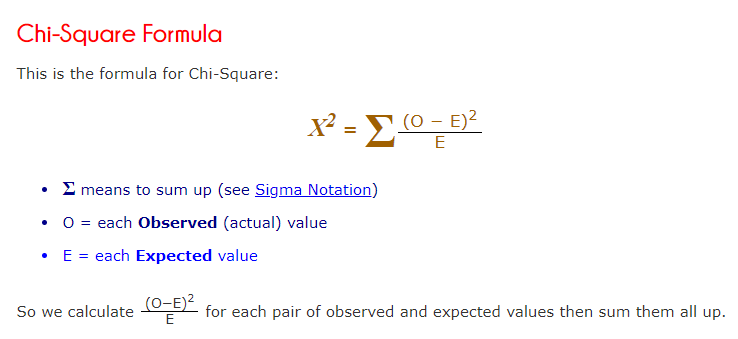

* **Good Fit**: If the significance value that is p-value associated with chi-square statistics is 0.002, there is very strong evidence of rejecting the null hypothesis of no fit. It means good fit.

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


### Chi-Sqaured Test of Independence

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another.

For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent.

On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-squared test of independence tests whether two categorical variables are independent.


### Effect of LandContour on SalePrice

In [ ]:
# Let's test if knowing LandContour which is the overall flatness of the property tells us anything about the price

# For this let's divide the SalePrice in three buckets - High, Medium, Low

import scipy.stats as sp
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return


price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


* The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.

**The frequency distribution reflects this**
* Houses that are Near Flat/Level(Lvl) have an equal distribution of SalePrice.
* On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.

### ANOVA (Analysis of Variance):

 ANOVA is used to determine if there is a significant difference between the means of three or more groups. It partitions the total variance of the data into different sources and calculates an F-statistic, which is compared to a critical value from an F-distribution to determine if the results are statistically significant. The formula for the F-statistic is:

F-statistic = (Between-group variance / (k-1)) / (Within-group variance / (n-k))

where k is the number of groups, n is the total sample size, and the between-group variance and within-group variance are calculated as:

Between-group variance = Σ (group mean — overall mean)² / (k-1)

Within-group variance = Σ (observation — group mean)² / (n-k)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data
data = pd.read_csv("data.csv")

# Perform ANOVA
model = ols('score ~ group', data=data).fit()
anova = sm.stats.anova_lm(model, typ=2)

print(anova)

### T-Test

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It is a type of parametric test that assumes the data is normally distributed and that the variances of the two groups are equal.

There are two main types of t-tests:

- One-sample t-test: used to compare the mean of a single group to a known value or a hypothesized value.
- Two-sample t-test: used to compare the means of two independent groups.

The t-test works by calculating the t-statistic, which measures the difference between the means of the two groups relative to the variation within each group.

The t-statistic is then compared to a critical value from the t-distribution, based on the degrees of freedom and the desired level of significance (usually 0.05). If the calculated t-statistic is greater than the critical value, the null hypothesis (that the means are equal) is rejected in favor of the alternative hypothesis (that the means are different).

Here is the formula for the t-statistic:

t = (x1 — x2) / (s * sqrt(2/n))

where:

x1 and x2 are the sample means of the two groups
s is the pooled standard deviation of the two groups
n is the sample size of each group
And here is some example Python code for conducting a two-sample t-test:

In [ ]:
from scipy.stats import ttest_ind

group1 = [1, 2, 3, 4, 5]
group2 = [6, 7, 8, 9, 10]

t_stat, p_value = ttest_ind(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

## E. Regression analysis:



Regression analysis is used to examine the relationship between a dependent variable and one or more independent variables. It calculates the coefficients of the regression equation, which can be used to make predictions. The most common type of regression analysis is linear regression, which assumes a linear relationship between the variables. The formula for the regression equation is:

Y = a + bX

where Y is the dependent variable, X is the independent variable, a is the intercept, and b is the slope. The coefficients are estimated using the method of least squares, which minimizes the sum of squared residuals. The t-test and F-test are used to determine if the coefficients are statistically significant.


In Python, the statsmodels module provides functions to perform linear regression. Here's an example:

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv("data.csv")

# Perform linear regression
X = data["X"]
Y = data["Y"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())